<a href="https://colab.research.google.com/github/AkshayAks24/ML/blob/main/Medical_isnurance_cost_predicting_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data  Collection & ANalysis

In [ ]:
 #loading the data from csv file to pandas data frame
 insurance_data =  pd.read_csv('/content/insurance.csv')

In [ ]:
#First five rows of the data frame
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#number of rows and columns
insurance_data.shape

(1338, 7)

In [ ]:
#getting some information about data set
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features


*     sex
*    smoker

*   region






In [ ]:
#checking for missing values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis


In [ ]:
#statistical measure of the dataset
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


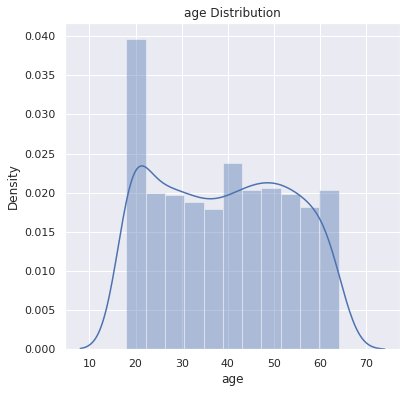

In [ ]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title('age Distribution')
plt.show()

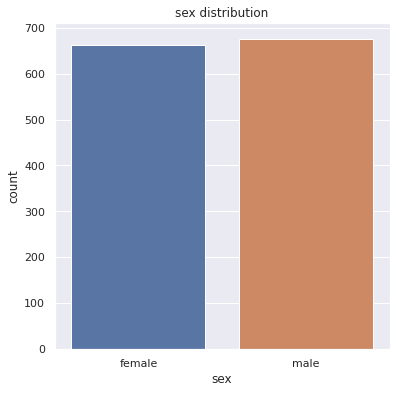

In [ ]:
#Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x ='sex',data = insurance_data)
plt.title('sex distribution')
plt.show()


In [ ]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


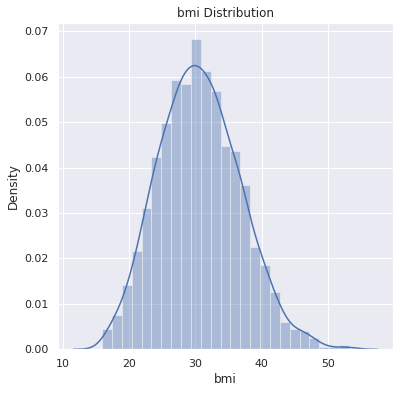

In [ ]:
#distribution of bmi value
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title('bmi Distribution')
plt.show()

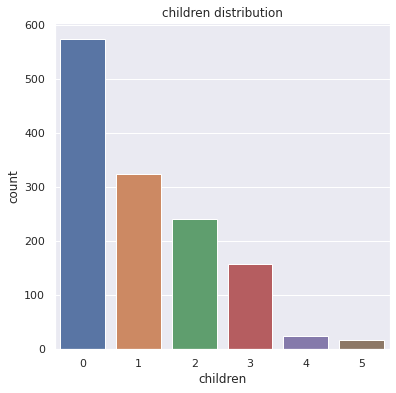

In [ ]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x ='children',data = insurance_data)
plt.title('children distribution')
plt.show()

In [ ]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

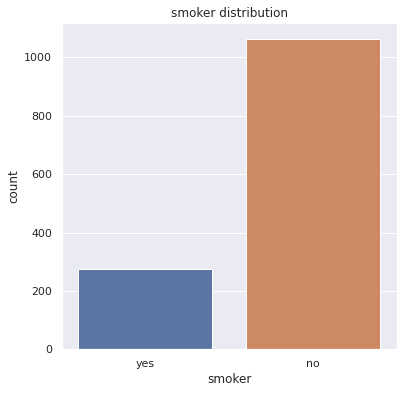

In [ ]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x ='smoker',data = insurance_data)
plt.title('smoker distribution')
plt.show()

In [ ]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

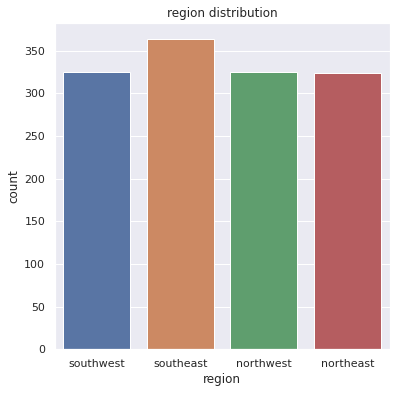

In [ ]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x ='region',data = insurance_data)
plt.title('region distribution')
plt.show()

In [ ]:
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


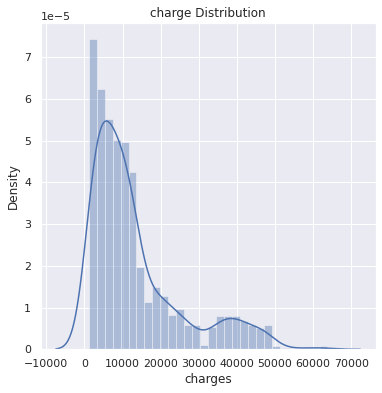

In [ ]:
#distribution of charges 
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['charges'])
plt.title('charge Distribution')
plt.show()

Date preprocessing

Encoding the categorical features

In [ ]:
#encoding sex column
insurance_data.replace({'sex':{'male':0,'female':1}},inplace = True)
#encoding smoker column
insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace = True)
#encoding region column
insurance_data.replace({'region':{'southeast':0,'southwest':1, 'northeast':2,'northwest':3}},inplace = True)



splitting the features and target


In [ ]:
X = insurance_data.drop(columns = 'charges',axis = 1)
y = insurance_data['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [ ]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into training data and testing data


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training


In [ ]:
#loading the linear regression model
reg = LinearRegression()

In [ ]:
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Model Evaluation


In [ ]:
#preficyion on training data
t_pred = reg.predict(X_train)

In [ ]:
#R square value
r2_train = metrics.r2_score(y_train,t_pred)
print('R squared value:',r2_train)

R squared value: 0.751505643411174


In [ ]:
 #preficyion on test data
tt_pred = reg.predict(X_test)
#R square value
r2_test = metrics.r2_score(y_test,tt_pred)
print('R squared value:',r2_test)

R squared value: 0.7447273869684077


Building a Predictive System


In [ ]:
input_data = (37,1,27.74,0,1,3)
#changing input_Data to numpy arr
input_data_as_numpy_array = np.asarray(input_data)
#reshap the array
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
prediction = reg.predict(input_data_reshape)
print(prediction)
print('the insurance cost is USD',prediction[0])

[6566.47133324]
the insurance cost is USD 6566.471333238051


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
